# Tannhäuser RGB version


Black and White image compression with SVD 
* Decompose Matrix X as U*Σ*VT 
* Might approximate this by some low rank product X = UrΣrVTr (this is a rank R 
approximation of X) 
* this approximation is the product of a few r columns and r rows of the original m by m rows and columns of X 

## Initialization 

In [6]:
import os
import numpy as np # for representing matrices as numpy arrays 
from PIL import Image # for image opening / show operations (image.open(), Image.show() etc...)
# numpy.linalg.svd is the numpy function that performs SVD 
import matplotlib.pyplot as plt
import matplotlib.image
import requests  # Added requests import
from io import BytesIO  # Added BytesIO import

In [7]:
def download_image(url):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception if there's an error
    return Image.open(BytesIO(response.content))

url = 'https://static.wikia.nocookie.net/supermarioglitchy4/images/f/f3/Big_chungus.png/revision/latest?cb=20200511041102'
img = download_image(url)

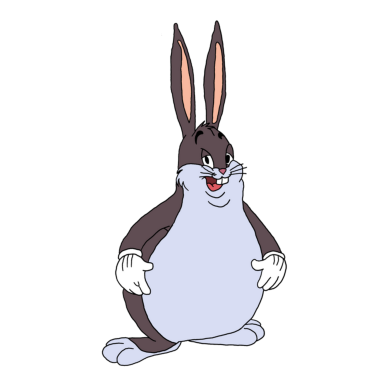

In [8]:
plt.axis('off')
plt.imshow(img)
plt.show()  # Added plt.show() to display the image

## Image Compression

In [17]:
def compress_image(img, k):
    img_array = np.array(img)
    red, green, blue = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

    U_r, Σ_r, VT_r = np.linalg.svd(red, full_matrices=False)
    U_g, Σ_g, VT_g = np.linalg.svd(green, full_matrices=False)
    U_b, Σ_b, VT_b = np.linalg.svd(blue, full_matrices=False)

    red_approx = (U_r[:, :k] @ np.diag(Σ_r[:k]) @ VT_r[:k, :]).clip(0, 255).astype(np.uint8)
    green_approx = (U_g[:, :k] @ np.diag(Σ_g[:k]) @ VT_g[:k, :]).clip(0, 255).astype(np.uint8)
    blue_approx = (U_b[:, :k] @ np.diag(Σ_b[:k]) @ VT_b[:k, :]).clip(0, 255).astype(np.uint8)

    img_approx = np.stack([red_approx, green_approx, blue_approx], axis=-1)
    return Image.fromarray(img_approx), Σ_r, Σ_g, Σ_b

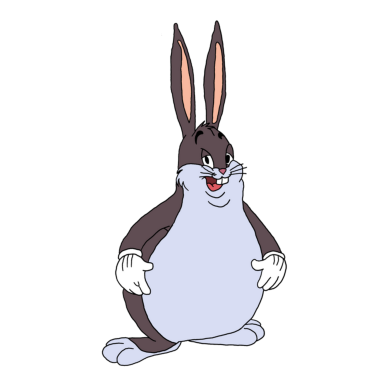

In [19]:
img_approx, Σ_r, Σ_g, Σ_b = compress_image(img, 64)

plt.figure(0)
plt.axis('off')
plt.imshow(img)

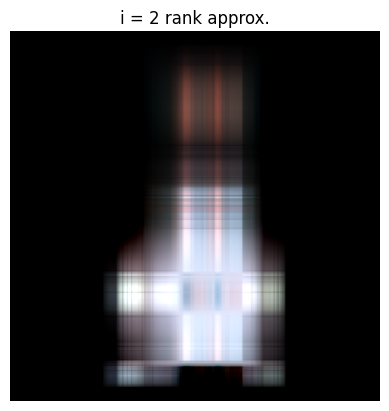

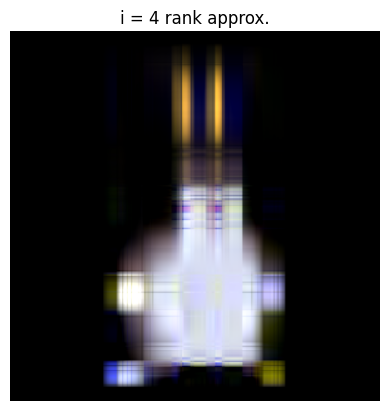

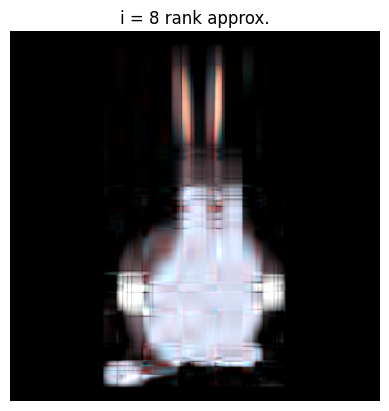

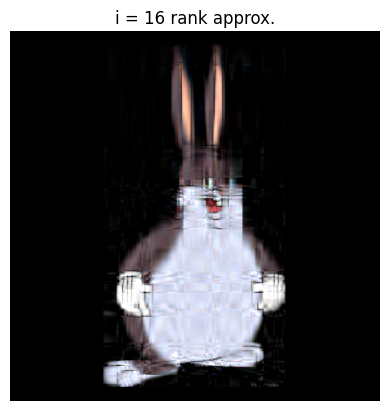

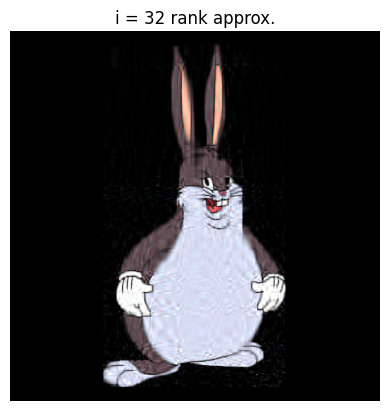

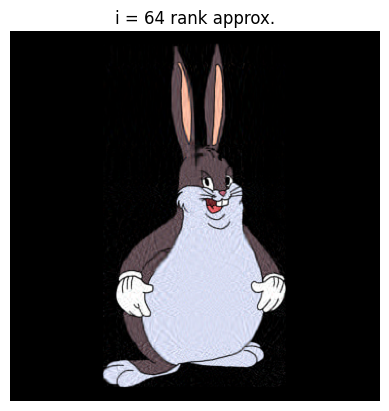

In [22]:
for i in [2, 4, 8, 16, 32, 64]:
    img_approx = compress_image(img, i)[0]  # Only take the compressed image and not the singular values
    plt.figure(i+1)
    plt.imshow(img_approx)
    plt.title("i = %s rank approx." % i)
    plt.axis('off')
    plt.show()

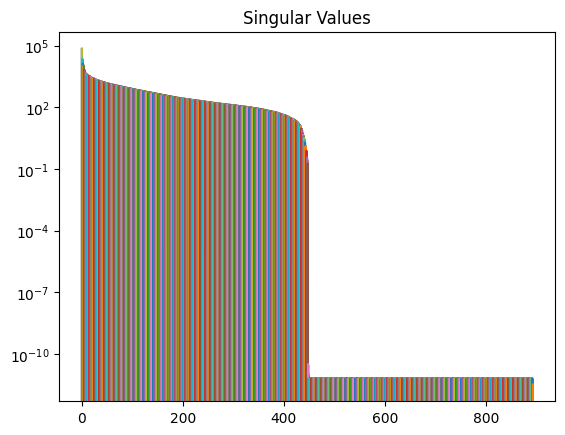

In [25]:
plt.figure(1)
plt.semilogy(np.diag(Σ_r), label='Red')
plt.semilogy(np.diag(Σ_g), label='Green')
plt.semilogy(np.diag(Σ_b), label='Blue')
plt.title('Singular Values')
plt.show()

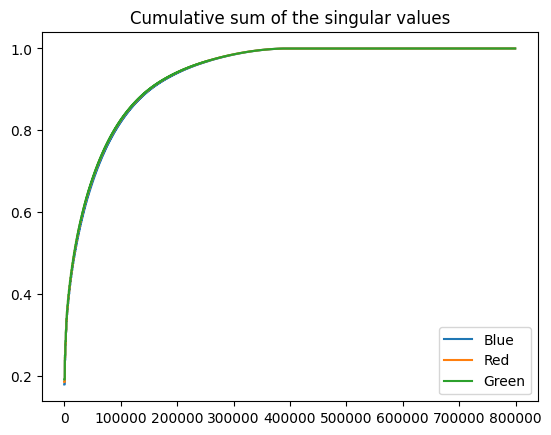

In [34]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(Σ_r))/np.sum(np.diag(Σ_r)), label='Blue')
plt.plot(np.cumsum(np.diag(Σ_g))/np.sum(np.diag(Σ_g)), label='Red')
plt.plot(np.cumsum(np.diag(Σ_b))/np.sum(np.diag(Σ_b)), label='Green')
plt.title('Cumulative sum of the singular values')
plt.legend()
plt.show()
## Note the overlap as it is the cumulative sum

In [ ]:
# Combine all singular values
Σ_combined = np.concatenate([np.diag(Σ_r), np.diag(Σ_g), np.diag(Σ_b)])

# Sort in descending order
Σ_combined = np.sort(Σ_combined)[::-1]

# Calculate the cumulative sum and total sum
cumsum_combined = np.cumsum(Σ_combined)
total_sum_combined = np.sum(Σ_combined)

# Plot the cumulative sum
plt.plot(cumsum_combined / total_sum_combined, label='Combined')

plt.title('Cumulative sum of the singular values')
plt.legend()
plt.show()
